<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/master/Titanic_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic ML Competition from Kaggle

This notebook will be working on the Titanic competition from Kaggle. I will be using the same approach of the Hands on ML book in the 2nd chapter

## Uploading the dataset

In [81]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [82]:
# Importing the trainning dataset

df = pd.read_csv('/content/train.csv')


## EDA

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Variable	Definition	Key**

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = 
Queenstown, S = Southampton


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [87]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [88]:
men = df.loc[df['Sex']=='male']['Survived']
rate_men = sum(men)/len(men)

print('% of men who suvived:', rate_men)

% of men who suvived: 0.18890814558058924


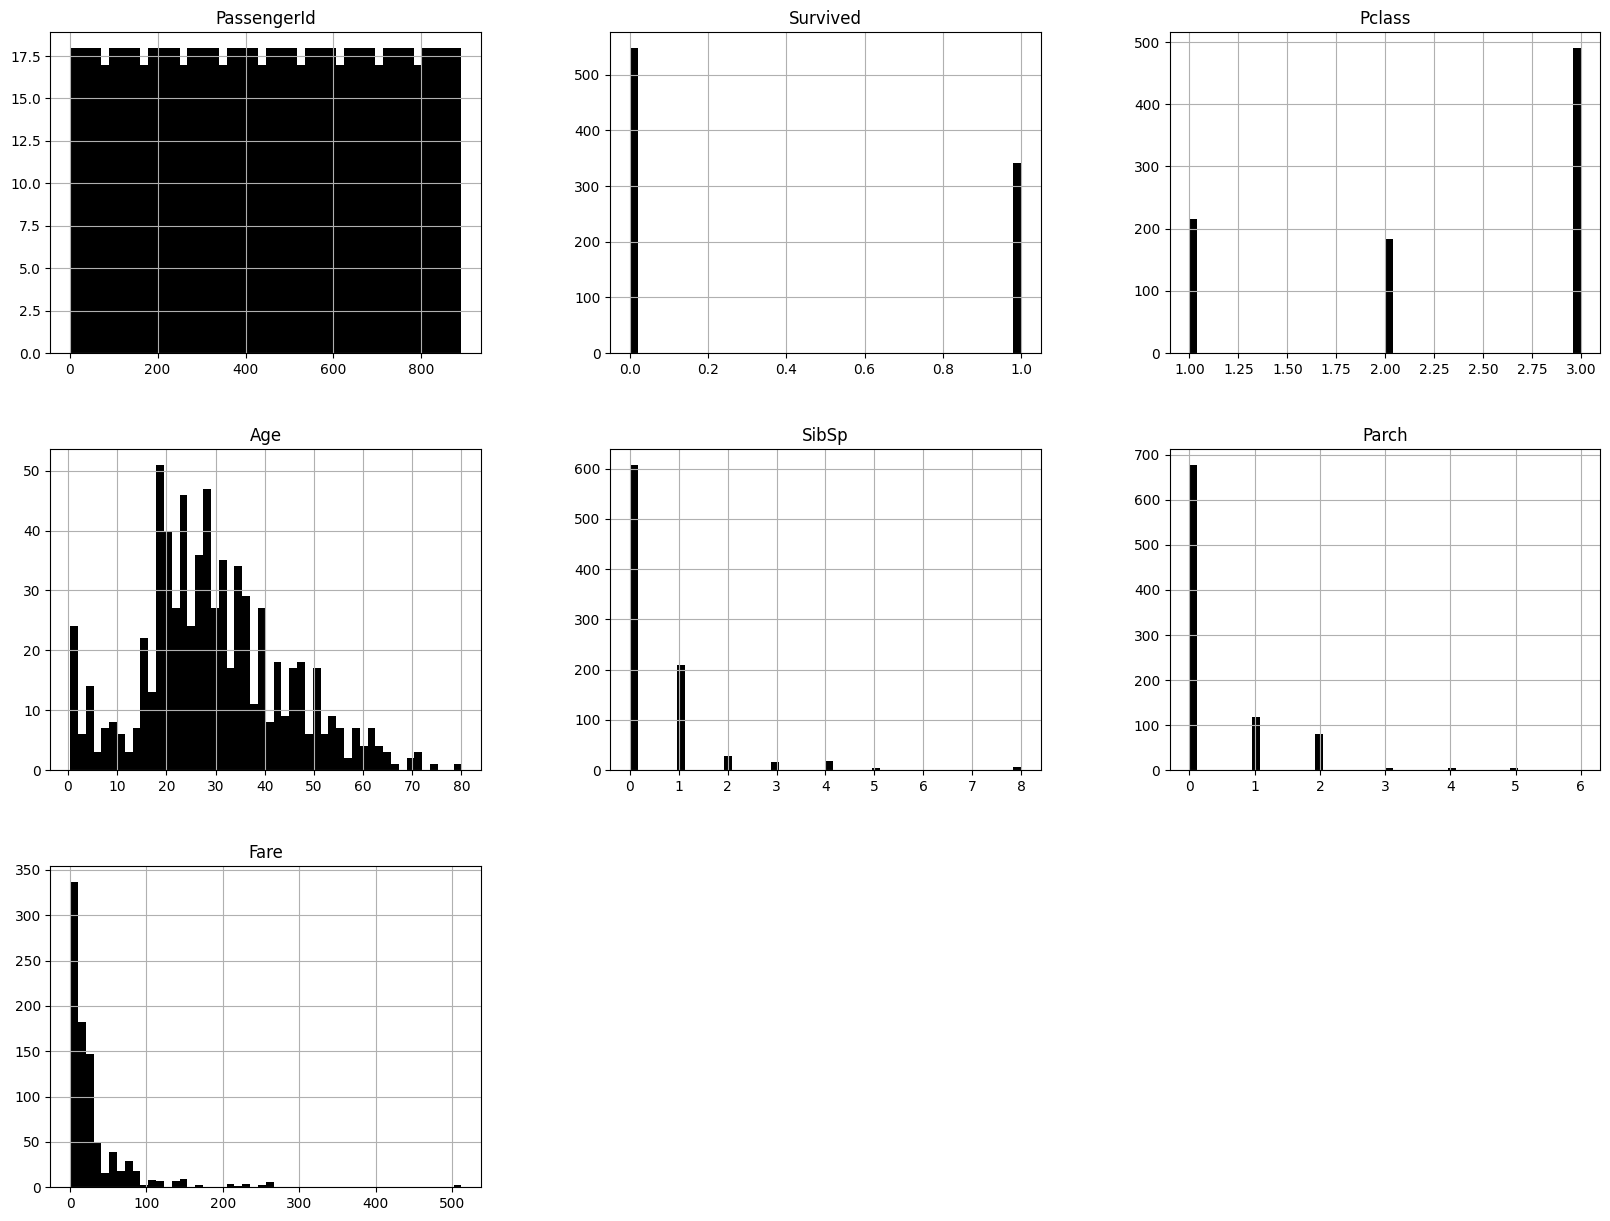

In [89]:
import matplotlib.pyplot as plt


df.hist(bins=50, figsize=(20,15), color='k')
plt.show()

In [90]:
# Knowing the null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
# Treating the Age column

df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [92]:
# Treating the cabin column

df.drop('Cabin', axis=1, inplace=True)

In [94]:
# Treating the Embarked column

df.dropna(subset=['Embarked'], inplace=True)

In [100]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_cat        0
dtype: int64

## Creating a test 

In [101]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Stratifying the train and test sets

For such small dataset, stratifying it is quite interesting and can bring more accuracy to our project.

In [102]:
df['Age_cat'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf],
                       labels=[1, 2, 3, 4, 5, 6, 7, 8])

<Axes: >

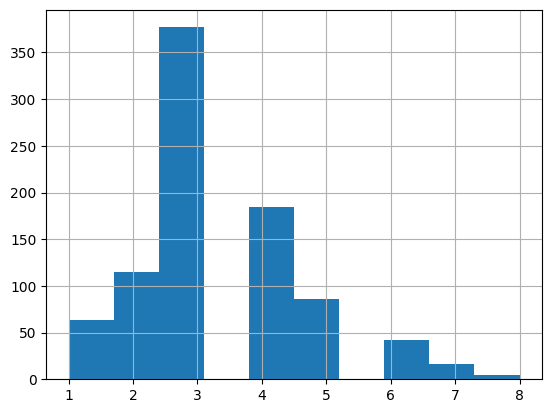

In [103]:
df['Age_cat'].hist()

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit 

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, df['Age_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [107]:
strat_test_set['Age_cat'].value_counts()/len(strat_test_set)  

3    0.426966
4    0.207865
2    0.129213
5    0.095506
1    0.073034
6    0.044944
7    0.016854
8    0.005618
Name: Age_cat, dtype: float64

In [108]:
# droping the 'Age_cat' column

for set_ in (strat_train_set, strat_test_set):
  set_.drop('Age_cat', axis=1, inplace=True)

In [112]:
# Copying the train dataset to df

df = strat_test_set.copy()

## Looking for correlations

In [113]:
corr_matrix = df.corr()

<ipython-input-113-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [114]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.320897
Parch          0.194551
PassengerId    0.027687
SibSp          0.021164
Age            0.008756
Pclass        -0.413628
Name: Survived, dtype: float64

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Parch'>,
        <Axes: xlabel='Fare', ylabel='Parch'>,
        <Axes: xlabel='Pclass', ylabel='Parch'>,
        <Axes: xlabel='Parch', ylabel='Parch'>]], dtype=object)

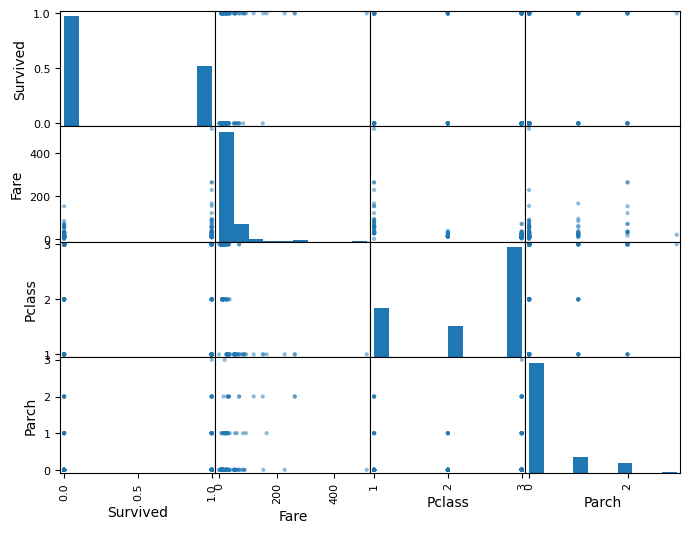

In [115]:
# Another way to find correlation - Didnt help much

from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Fare', 'Pclass', 'Parch']

scatter_matrix(df[attributes], figsize=(8,6))

## Creating new attributes



In [116]:
df['Fare_per_Parch'] = df['Fare']/df['Parch']
df['Pclass_per_Age'] = df['Pclass']/df['Age']

In [117]:
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

<ipython-input-117-c706ad72281b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Survived          1.000000
Fare              0.320897
Fare_per_Parch    0.246290
Parch             0.194551
Pclass_per_Age    0.125670
PassengerId       0.027687
SibSp             0.021164
Age               0.008756
Pclass           -0.413628
Name: Survived, dtype: float64

## Preparaing the data for the ML algorithm



In [118]:
# the first thing is to create a dataset for predictors and labels

df = strat_train_set.drop('Survived', axis=1)
df_label = strat_test_set['Survived'].copy()

## Data Cleaning